In [1]:
# !pip install pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fileName = "./lab03_performance_(200_500000).csv"
# no index column, first row as header, ignore last two rows (meta), only import first 5 cols.
df = pd.read_csv(fileName, index_col=False, header=0, skipfooter=2, engine='python', usecols=range(0, 4))
df.columns = ['start time', 'request type', 'latency', 'response code']

In [4]:
df.sample(7)

,start time,request type,latency,response code
434430,2023-02-04 17:22:47,POST,30,200
396463,2023-02-04 17:22:39,POST,42,200
29908,2023-02-04 17:21:23,POST,40,200
28684,2023-02-04 17:21:23,POST,32,200
485148,2023-02-04 17:22:57,POST,49,200


#### Required Metrics:
1. mean response time (millisecs)
2. median response time (millisecs)
3. throughput = total number of requests/wall time (requests/second)
4. p99 (99th percentile) response time. Here’s a nice article Links to an external site. about why percentiles are important and why calculating them is not always easy. (millisecs)
5. min and max response time (millisecs)

In [5]:
# 1. mean response time
print("1. The average response time: ", round(df['latency'].mean(),2), "ms")
# 2. median response time
print("2. The median response time: ", round(df['latency'].median(),2), "ms")

The average response time:  41.56 ms
The median response time:  39.0 ms


In [13]:
meta_df = pd.read_csv(fileName, index_col=False, engine='python', usecols=range(0, 4))
meta_df = meta_df.tail(2)
meta_df.columns = meta_df.iloc[0].tolist()
meta_df = meta_df.tail(1)
meta_df = meta_df.reset_index(drop=True)
# meta_df

In [53]:
# 3. throughput
throughput = round(1000 * int(meta_df[" total request"][0].strip()) / int(meta_df["Total time spend"][0][:-2]),2)
print("3. The throughput: ", throughput, "requests/second")

3. The throughput:  4785.28 requests/second


In [42]:
# 4. p99
print("4. The p99 response time: ", df["latency"].quantile(0.99), "ms")

4. The p99 response time:  83.0 ms


In [43]:
# 5. the min and max response time
print("5. The min response time: ", df["latency"].min(), "ms")
print("and the max response time: ", df["latency"].max(), "ms")

5. The min response time:  22 ms
and the max response time:  555 ms


### Task 4: Plot Performance
You need to plot a graph that shows the average throughput of requests for the period of your test. To do this, create a chart that has:

x-axis values: unit is seconds, from 0 to test wall time, with intervals of one second

y-axis values: unit is throughput/second, showing the number of requests completed in each second of the test

You can create the chart programmatically of just dump the values into a spreadsheet and go for your life!

In [44]:
df.columns

Index(['start time', 'request type', 'latency', 'response code'], dtype='object')

In [64]:
groupby_df = df.groupby("start time").count()
# groupby_df

,request type,latency,response code
start time,,,
2023-02-04 17:21:16,505,505,505
2023-02-04 17:21:17,2175,2175,2175
2023-02-04 17:21:18,4208,4208,4208
2023-02-04 17:21:19,4584,4584,4584
2023-02-04 17:21:20,4688,4688,4688
...,...,...,...
2023-02-04 17:22:56,5003,5003,5003
2023-02-04 17:22:57,4749,4749,4749
2023-02-04 17:22:58,5267,5267,5267


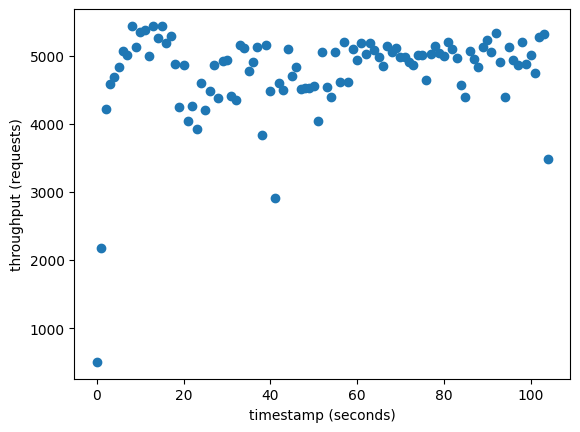

In [67]:
x = [_ for _ in range(len(groupby_df))]
y = groupby_df["latency"].tolist()

plt.scatter(x, y)
plt.xlabel("timestamp (seconds)")
plt.ylabel("throughput (requests)")
plt.show()